### sqlite

In [10]:
import tensorflow as tf
def parse_img(path):
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img,channels=3,dct_method='INTEGER_ACCURATE',try_recover_truncated=True)
    img = tf.cast(img, dtype=tf.dtypes.float32) / 255.0
    img = tf.image.resize_with_pad(img, 224, 224)
    return img

In [11]:
import sqlite3
# conn = sqlite3.connect("/data/aoi-wzs-p1-dip-fa-nvidia/metadata.db")
conn = sqlite3.connect("/data/aoi-wzs-p1-dip-fa-nvidia/training/p1-dip-metadata.db")
c = conn.cursor()

In [13]:
x = c.execute('select path from metadata where component_class = "heat_sink" and (label = "OK" or label = "NG")').fetchall()
for xx in x:
    try:
        y = parse_img(xx[0])
    except Exception as e:
        print(e, xx[0])

In [23]:
c.execute("""select component_class, label, count(*) from metadata 
    where
        ( component_class = 'heat_sink' or 
        component_class = 'screw' or 
        component_class = 'label' )
        group by component_class, label""")
c.fetchall()

[('heat_sink', 'NG', 84),
 ('heat_sink', 'OK', 12062),
 ('heat_sink', 'other', 3),
 ('label', 'NG', 1104),
 ('label', 'OK', 18898),
 ('label', 'other', 81),
 ('screw', 'NG', 104),
 ('screw', 'OK', 3426),
 ('screw', 'other', 540)]

In [19]:
x = c.execute("""select * from metadata
        where
            component_class = 'heat_sink' and
            label = 'other' 
        """).fetchall()
len(x)

8

In [22]:
start = 0
# c.execute('update metadata set degree="090" where path=?',(x[start][0],)).fetchall()
# c.execute('update metadata set label="NG" where path=?',(x[start][0],)).fetchall()
end = 3
while start<=end:
    c.execute('update metadata set label="NG" where path=?',(x[start][0],)).fetchall()
    start+=1

### mysql

In [1]:
import mysql.connector
mydb = mysql.connector.connect(
    host="10.41.241.230",
    port="30003",
    user="aoi_ai",
    password="finding_way_out",
    database="P1")
c = mydb.cursor()

In [4]:
c.execute(f"select path from dip_fa where filename like '%LABEL_REV.jpg' and label = 'NG'")
x = c.fetchall()
len(x)

39

In [7]:
start = 0
end = 38
while start<=end:
    sql = f'update dip_fa set label="OK" where path="{x[start][0]}"'
    c.execute(sql)
    mydb.commit()
    start+=1

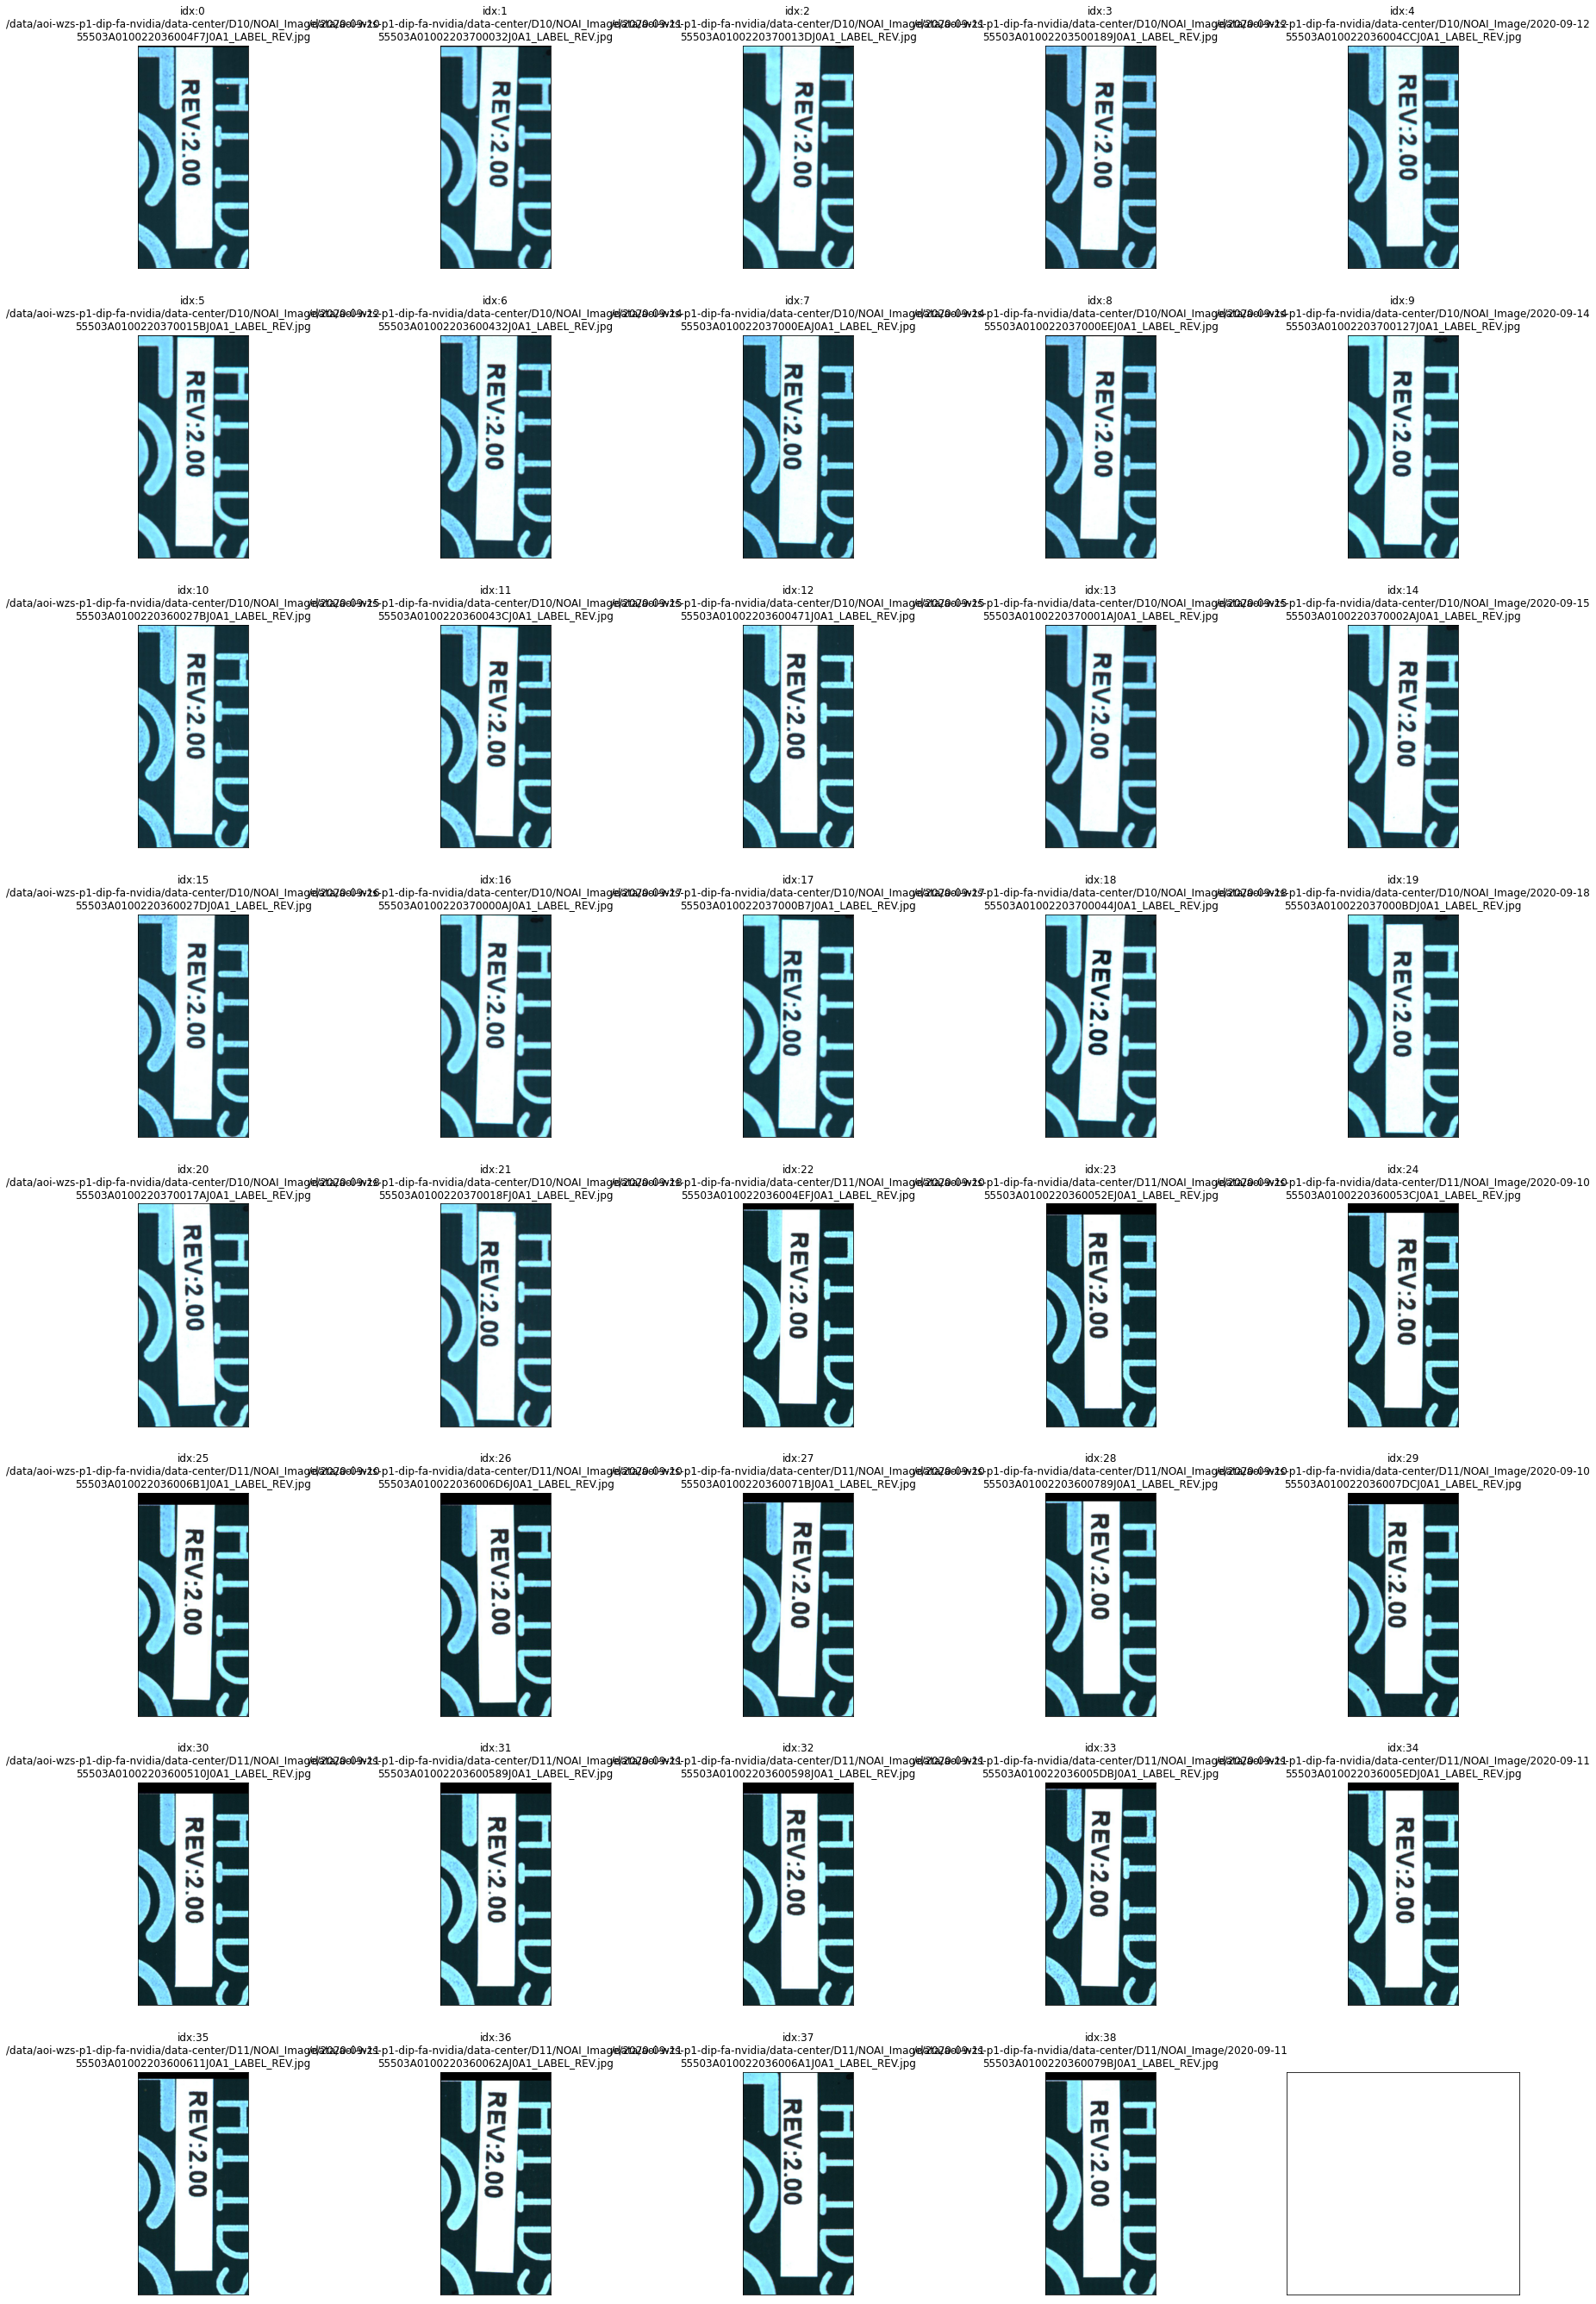

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
# h = 120
h = int(len(x)/5)+1
fig_h = h * 6
startofx = 0
%matplotlib inline
fig, axes = plt.subplots(h, 5, figsize=(30, fig_h), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for idx, (ax, value) in enumerate(zip(axes.flat, x[startofx:])):
    try:
        ax.imshow(Image.open(value[0]))
        ax.set_title(f'idx:{startofx+idx}\n{os.path.split(value[0])[0]}\n{os.path.split(value[0])[1]}')
    except Exception as e:
        print(e)
# plt.show()

In [7]:
paths = [
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D3/OK/2020-05-22/MBL509W20785C30_HBIG_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D4/OK/2020-03-16/CN0YTVTTWS30003B00DPA05_HSU_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D4/OK/2020-03-16/CN0YTVTTWS30003E0036A05_HSU_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D4/OK/2020-07-10/CN03MN20WS300079000WA04_HSRPREPINNG_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D4/OK/2020-05-22/CN0YTVTTWS30005L0022A06_HSU_000_000_000.jpg',)]

# heat_sink, ok, data-center
with conn:
    conn.executemany("""update metadata set label='NG' where path=?""", paths)

In [8]:
paths = [
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/20200612/NG/QTL316W10016A10_LABEL-SAS_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/20200612/NG/QTL316W10015A10_LABEL-SAS_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/20200612/NG/QTL316W10021A10_LABEL-SAS_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/20200612/NG/QTL303W10125A10_LABEL-SAS_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/20200612/NG/QTL316W10008A10_LABEL-SAS_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/20200612/NG/QTL303W10066A10_LABEL-SAS_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/20200612/NG/MBL602W61761A20_LABEL-AMI1_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/20200612/NG/QTL303W10149A10_LABEL-SAS_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/20200612/NG/QTL303W10105A10_LABEL-SAS_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/20200612/NG/QTL316W10054A10_LABEL-SAS_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D1/NG/2020-08-13/WTH103318HZA1_LabelB91_000_000_000.jpg',)]

# label, ng, data-center
with conn:
    conn.executemany("""update metadata set label='OK' where path=?""", paths)

In [9]:
paths = [
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/20200702/NG/MBL626W10067A20_SCMH62_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/NG/2020-04-17/MBL406W20732A20_SRP1_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D1/NG/2020-09-09/WTH10370A0ZA1_SRM8D1_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D1/NG/2020-09-08/WTH103668YZA1_SRM8D1_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D1/NG/2020-09-03/WTH10361E7ZA1_SRM8D1_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D1/NG/2020-09-03/WTH10361TCZA1_SRM8D1_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D13/NG/2020-07-23/55501901008003000108J0D1_SBT1_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D13/NG/2020-07-23/55501901008003000073J0D1_SBT1_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D13/NG/2020-07-23/555019010080030001ACJ0D1_SBT1_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D13/NG/2020-07-23/55501901008003000173J0D1_SBT1_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D13/NG/2020-07-23/55501901008003000120J0D1_SBT1_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D9/20200716/NG/MBL709W20441A60_SCPULUOSI1_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D9/20200716/NG/MBL708W30410A60_SCPULUOSI4_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D11/NG/2020-08-04/55505Z010001031000A9J0A1_SLS12_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D11/NG/2020-08-04/55505Z010001031000AAJ0A1_SLS12_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D11/NG/2020-08-04/55505Z01000103100061J0A1_SB-LUOS-2-6_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D11/NG/2020-08-04/55505Z010001031000F5J0A1_SLS12_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D11/NG/2020-08-04/55505Z010001031000B3J0A1_SLS12_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D11/NG/2020-08-04/ZHX20180116041425238004839820200805073813625_SLS12_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D11/NG/2020-08-05/ZHX20180116041425238004839820200805173451186_SLS12_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D11/NG/2020-08-05/55505Z01000103100113J0A1_SLS12_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D11/NG/2020-08-05/55505Z01000103100121J0A1_SLS12_000_000_000.jpg',), 
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D11/NG/2020-08-05/55505Z0100010310010FJ0A1_SLS12_000_000_000.jpg',)]

# screw, ng, data-center
with conn:
    conn.executemany("""update metadata set label='OK' where path=?""", paths)

In [10]:
paths = [
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/OK/2020-04-10/MBL402W20772A20_SCMH62_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D8/OK/2020-04-10/MBL402W20772A20_SCMH61_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D5/OK(Overkill)/2020-06-20/CN0DG2JCWS30006F002RA02_SCMH10_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D9/20200716/OK/ZHX2E84F50020200714165612008_SLUOSI_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D9/20200716/OK/MBL709W30511A60_SLUOSI_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D15/OK/2020-07-23/PWZWVA3WGE0057_SJ2-1_000_000_000.jpg',),
    ('/data/aoi-wzs-p1-dip-fa-nvidia/data-center/D15/OK/2020-07-23/PWZWVA3WGE001D_SJ2-1_000_000_000.jpg',)]

# screw, ok, data-center
with conn:
    conn.executemany("""update metadata set label='NG' where path=?""", paths)

### tensorflow.keras.layers.experimental.preprocessing

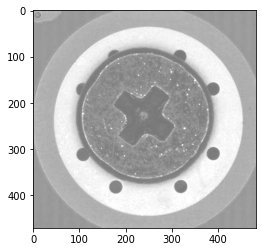

In [69]:
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
path = '/data/aoi-wzs-p1-dip-fa-nvidia/label_heatsink_screw/totest/WK44/Label 散热片/8SSB27A74890W2ZS0AN001F_SLSH9_000_000_000.jpg'
image = tf.io.read_file(path)
# image = tf.io.decode_image(image, channels=3,expand_animations = False)
image = tf.io.decode_jpeg(image, channels=3,dct_method='INTEGER_ACCURATE',try_recover_truncated=True)
### tf.image ###
def random_aug_parse_img(x, p=0.5):
    if tf.random.uniform([]) < p:
        x = tf.image.rgb_to_grayscale(x)
        x = tf.squeeze(x, axis=-1)
        x = tf.stack([x, x, x], axis=-1)
    if tf.random.uniform([]) < p:
        x = tf.image.flip_left_right(x)
    if tf.random.uniform([]) < p:
        x = tf.image.adjust_saturation(x, tf.random.uniform([]).numpy() * 3)
    if tf.random.uniform([]) < p:
        x = tf.image.adjust_brightness(x, tf.random.uniform([]).numpy() / 2)
    if tf.random.uniform([]) < p:
        x = tf.image.central_crop(x, central_fraction=(tf.random.uniform([]).numpy() + 1 ) / 2)
    return x
image = random_aug_parse_img(image)
### tf.keras.layers.experimental.preprocessing ###
# image = tf.expand_dims(image, 0)
# image = tf.keras.layers.experimental.preprocessing.Resizing(200, 200)(image)
# image = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)(image)
plt.imshow(image)

In [167]:
tf.random.uniform([]).numpy()

0.7192979

In [91]:
tf.random.uniform([]).numpy() * 3

2.203906774520874